In [8]:
import pandas as pd


In [9]:
#**Import Data set** 

In [10]:
df=pd.read_csv("Titanic_passengers.csv")

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
df.shape

(418, 12)

In [14]:
#**Clean the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
#**Replacing Missing Numerical Values with the appropriate values**
#Replacing Missing Numerical Values of the "Age" Feature

In [17]:
df["Age"].fillna(df["Age"].mean(), inplace= True)

In [18]:
#**Replacing Missing Categorical Values with the appropriate values**
#Number of Elements per Category of the "Cabin","Fare" Feature

In [19]:
df["Cabin"].fillna(df["Cabin"].mode()[0],inplace=True)

In [24]:
print(df["Cabin"].value_counts())

B57 B59 B63 B66    330
B45                  2
C80                  2
C55 C57              2
C78                  2
                  ... 
C53                  1
E31                  1
D15                  1
F G63                1
A18                  1
Name: Cabin, Length: 76, dtype: int64


In [22]:
df["Fare"].fillna(df["Fare"].mode()[0],inplace=True)

In [25]:
print(df["Fare"].value_counts())

7.7500      22
26.0000     19
8.0500      17
13.0000     17
7.8958      11
            ..
31.6833      1
16.0000      1
53.1000      1
146.5208     1
20.2500      1
Name: Fare, Length: 169, dtype: int64


In [26]:
print(df["Embarked"].value_counts())

S    270
C    102
Q     46
Name: Embarked, dtype: int64


In [23]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Visualisation Phase

# Distribution of the most important features
#**"Age" Feature Distribution**

<AxesSubplot:title={'center':'Histogram of Different Ages'}, xlabel='Age', ylabel='Frequency'>

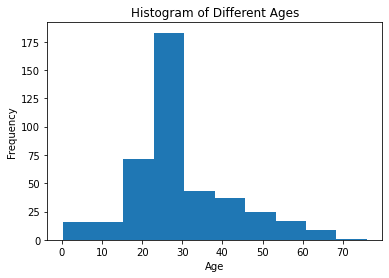

In [31]:
import matplotlib.pyplot as plt 
plt.title ("Histogram of Different Ages")
plt.xlabel("Age")
df["Age"].plot.hist()

**"Pclass"Feature Distribution**

In [36]:
import seaborn as sns 

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

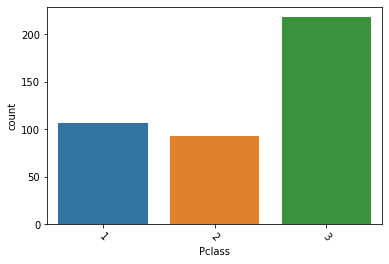

In [37]:
sns.countplot(x= "Pclass", data= df)
plt.xticks(rotation=-45)

Majority of passengers are in 3rd class

**"SEX" Distribution**

(array([0, 1]), [Text(0, 0, 'male'), Text(1, 0, 'female')])

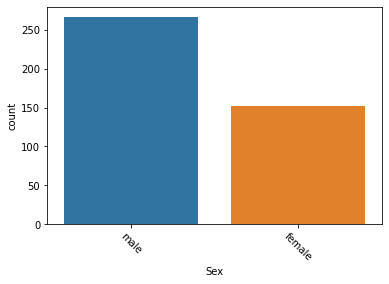

In [38]:
sns.countplot(x= "Sex", data= df)
plt.xticks(rotation=-45)

**"Embarked" Feature Distribution**

(array([0, 1, 2]), [Text(0, 0, 'Q'), Text(1, 0, 'S'), Text(2, 0, 'C')])

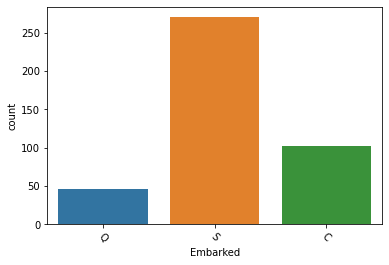

In [39]:
sns.countplot(x= "Embarked",data= df)
plt.xticks(rotation=-45)

 Majority of passengers embarked at S (Southampton).

# Correlation between "Sex" and "Age"

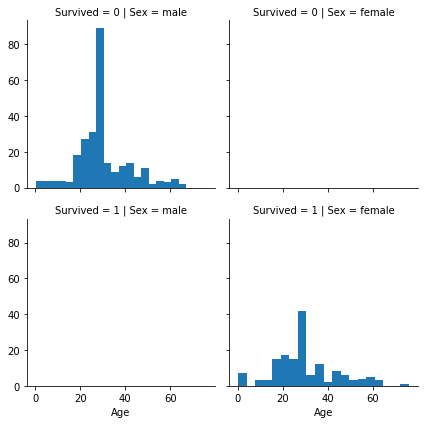

In [40]:
g=sns.FacetGrid(df, row= "Survived", col="Sex")
g.map(plt.hist, "Age", bins=20)

# Correlation between "Pclass" and "Embarked"

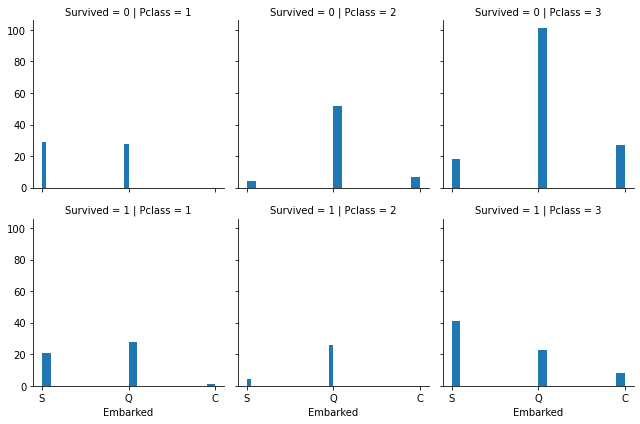

In [41]:
grid=sns.FacetGrid(df, row= "Survived", col="Pclass")
grid.map(plt.hist, "Embarked", bins=20)

# Correlation Heatmap

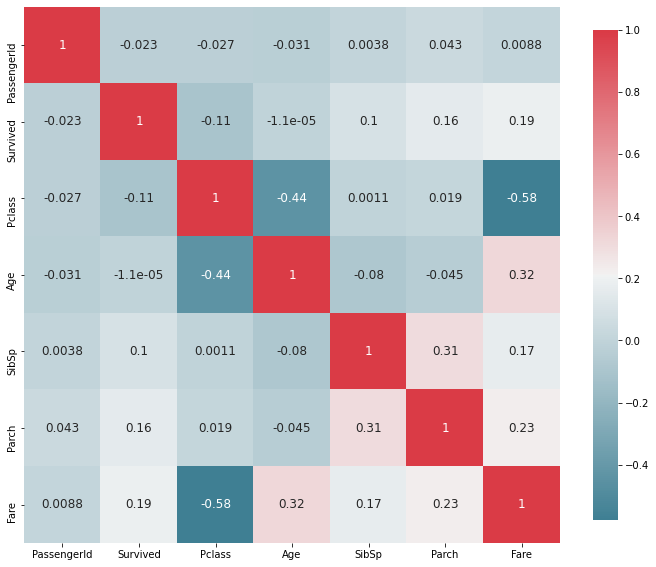

In [42]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }
        
    )

plot_correlation_map(df)

**To start with, the number of male passengers we extracted from the "Sex" feature distribution is much higher than the number of female passengers. From the correlation between "Age" and "Sex" features above, we can deduce that females are more likely to survive than males. Also, according to the "Age" feature distribution, most passengers are in 15-35 years range. However, a large number of passengers that are between 15 and 25 years old did not survive the incident. We then visualized the correlation between "Pclass" and "Embarked" features which supplied us with the information that the 3rd class passengers are more likely to be dead than other classes and 1st class passengers are more likely to survive than other classes. In addition, passengers who embarked at C had a higher survival rate than people who embarked at S or Q. Last but not least, the function we defined was used to build a correlation heatmap which is, in fact, a graphical representation of correlation matrix representing correlation between all the different features of our dataset. The value of correlation can take any values between -1 and 1. Values closer to zero means there is no linear relationship between the two variables. The closer to 1 the correlation is, the more positively correlated the variables are. The closer to -1 the correlation is, the more negatively correlated the variables are. For example, the correlation between SibSp and Parch variables is equal to 0.41. They are somehow considered to have a moderate positive relationship which means that parents and siblings like to travel together. Also, the correlation between Pclass and Fare variables is equal to -0.55. They have a strong negative correlation which means that higher economic classes ("Pclasses") pay more for their trip ("Fare").**

# Correlation grouby between "Pclass" and "Survived"

In [43]:
cleanup= {"Survived": {"No":0,"Yes":1}}
df.replace(cleanup, inplace=True)
df[["Pclass","Survived"]].groupby(["Pclass"], as_index=True).mean()


,Survived
Pclass,
1,0.467290
2,0.322581
3,0.330275


In [44]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,B57 B59 B63 B66,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,B57 B59 B63 B66,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,B57 B59 B63 B66,S


# Dropping useless columns 

In [90]:
new_df= df.copy()
new_df= new_df.drop(["PassengerId", "Name", "Ticket", "Cabin",], axis=1)
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


# Create a new Feature "FamilySize" from "SibSp" and "Parch" Features

In [91]:
new_df["FamilySize"]= new_df["SibSp"]+new_df["Parch"]
new_df= new_df.drop("SibSp", axis= 1)
new_df= new_df.drop("Parch", axis= 1)
new_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,34.5,7.8292,Q,0
1,1,3,female,47.0,7.0000,S,1
2,0,2,male,62.0,9.6875,Q,0
3,0,3,male,27.0,8.6625,S,0
4,1,3,female,22.0,12.2875,S,2


# Create a new column "Title"

In [92]:
new_df['Title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
new_df.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,0,3,male,34.5,7.8292,Q,0,Mr
1,1,3,female,47.0,7.0000,S,1,Mrs
2,0,2,male,62.0,9.6875,Q,0,Mr
3,0,3,male,27.0,8.6625,S,0,Mr
4,1,3,female,22.0,12.2875,S,2,Mrs


# Number of Elements per Category of the "Title" Feature

In [93]:
print(new_df["Title"].value_counts())

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64


**Correlation between "Title" and "Age"**

In [94]:
new_df[["Age", "Title"]].groupby(["Title"], as_index=True).mean()

,Age
Title,
Col,50.000000
Dona,39.000000
Dr,53.000000
Master,11.761922
Miss,23.300080
Mr,31.589740
Mrs,37.704526
Ms,30.272590
Rev,35.500000


**Correlation between "Title" and "Fare"**

In [95]:
new_df[["Fare", "Title"]].groupby(["Title"], as_index=True).mean()

,Fare
Title,
Col,128.012500
Dona,108.900000
Dr,81.858300
Master,38.494043
Miss,40.087876
Mr,25.489080
Mrs,59.974249
Ms,7.750000
Rev,19.500000


**Correlation between "Title" and "Pclass"**

In [96]:
new_df[["Pclass", "Title"]].groupby(["Title"], as_index=True).mean()

,Pclass
Title,
Col,1.000000
Dona,1.000000
Dr,1.000000
Master,2.714286
Miss,2.435897
Mr,2.320833
Mrs,1.833333
Ms,3.000000
Rev,2.000000


**Correlation between "Title" and "Sex"**

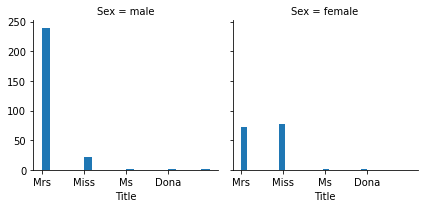

In [97]:
g=sns.FacetGrid(new_data, col="Sex")
g.map(plt.hist, "Title", bins=20)

# Creating a Dictionary

In [98]:

Title_Dictionary={"Capt": "Officer",
                  
                  "Col": "Officer", 
                  
                  "Major": "Officer",
                  
                  "Dr": "Officer", 
                  
                  "Rev": "Officer",
                  
                  "Jonkheer": "Royalty",
                  
                  "Don": "Royalty", 
                  
                  "Sir": "Royalty",
                  
                  "Lady": "Royalty",
                  
                  "the Countess": "Royalty",
                  
                  "Dona": "Royalty", 
                  
                  "Mme": "Miss",
                  
                  "Mlle": "Miss",
                  
                  "Miss": "Miss",
                  
                  "Ms": "Mrs", 
                  
                  "Mr": "Mrs",
                  
                  "Mrs": "Mrs", 
                  
                  "Master": "Master" 
                 }

**Add the Dictonary as a column to the DataFrame**

In [99]:
new_df['Title'] = new_data['Title'].map(Title_Dictionary)
new_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,0,3,male,34.5,7.8292,Q,0,Mrs
1,1,3,female,47.0,7.0000,S,1,Mrs
2,0,2,male,62.0,9.6875,Q,0,Mrs
3,0,3,male,27.0,8.6625,S,0,Mrs
4,1,3,female,22.0,12.2875,S,2,Mrs


**New Number of Elements per Category of the "Title" Feature**

# Visualize the same correlations
**Between "Title" and "Age"**

In [100]:
new_df[["Age", "Title"]].groupby(["Title"], as_index=True).mean()

,Age
Title,
Master,11.761922
Miss,23.300080
Mrs,32.992128
Officer,44.800000
Royalty,39.000000


**Between "Title" and "Pclass"**

In [101]:
new_df[["Pclass", "Title"]].groupby(["Title"], as_index=True).mean()

,Pclass
Title,
Master,2.714286
Miss,2.435897
Mrs,2.210863
Officer,1.400000
Royalty,1.000000


**Between "Title" and "Sex"**

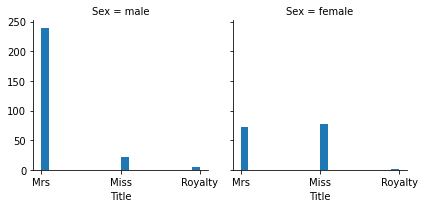

In [102]:
g=sns.FacetGrid(new_df, col="Sex")
g.map(plt.hist, "Title", bins=20)

In [103]:
new_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,0,3,male,34.5,7.8292,Q,0,Mrs
1,1,3,female,47.0,7.0000,S,1,Mrs
2,0,2,male,62.0,9.6875,Q,0,Mrs
3,0,3,male,27.0,8.6625,S,0,Mrs
4,1,3,female,22.0,12.2875,S,2,Mrs


# Correlation between "Survived" and "FamilySize"

In [104]:
new_df[["Survived", "FamilySize"]].groupby(["FamilySize"], as_index=True).mean()

,Survived
FamilySize,
0,0.268775
1,0.486486
2,0.526316
3,0.714286
4,0.285714
5,0.666667
6,0.250000
7,0.500000
10,0.500000


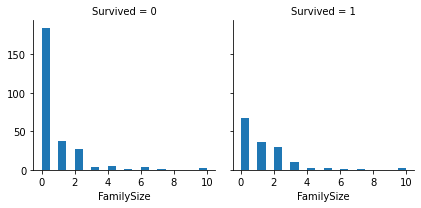

In [105]:
g=sns.FacetGrid(new_data, col="Survived")
g.map(plt.hist, "FamilySize", bins=20)


**"FamilySize" feature is useful as it shows us that survival rates are better when passengers are accompanied rather than alone**

# Features Transformation

In [106]:
from sklearn.preprocessing import LabelEncoder

In [107]:
encoder=LabelEncoder()
new_df["Title"]=encoder.fit_transform(new_df["Title"])
new_df["Embarked"]=encoder.fit_transform(new_df["Embarked"])
new_df["Sex"]=encoder.fit_transform(new_df["Sex"])
new_df

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,0,3,1,34.50000,7.8292,1,0,2
1,1,3,0,47.00000,7.0000,2,1,2
2,0,2,1,62.00000,9.6875,1,0,2
3,0,3,1,27.00000,8.6625,2,0,2
4,1,3,0,22.00000,12.2875,2,2,2
...,...,...,...,...,...,...,...,...
413,0,3,1,30.27259,8.0500,2,0,2
414,1,1,0,39.00000,108.9000,0,0,4
415,0,3,1,38.50000,7.2500,2,0,2
416,0,3,1,30.27259,8.0500,2,0,2


# Decision Tree

**Features Extraction**

In [108]:
X = new_df[["Pclass", "Age", "Sex", "FamilySize", "Fare", "Title"]]
y = new_df["Survived"]

**Split the dataset into train and test sets**

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

**Applying Algorithm**

In [111]:
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
dt = tree.DecisionTreeClassifier()  

**Fitting training data**

In [112]:
model= dt.fit(X_train, y_train)

**Testing model's performance**

In [113]:
y_pred= model.predict(X_test)

**Performance of the Decision Tree**

In [115]:
from sklearn.metrics import accuracy_score

In [116]:
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:1.0


# Decision Tree Visualization

In [122]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
import graphviz
dot_data= tree.export_graphviz(model , out_file=None)
graph= graphviz.Source(dot_data)
graph.render("new_df")
graph

*The first line of each node (except those of the final row) shows the splitting condition in the form "feature <= value". Next, we find the Gini Impurity of the node, which quantifies the purity of the node/leaf. A Gini score greater than zero implies that samples contained within that node belong to different classes. "Samples" is simply the number of observations contained in the node. Lastly, "Value" shows the class distribution of the samples ([count non_survived, count survived]).*

*The split that costs least is chosen since we always want to maximize our accuracy. In our example, the best split is the sex of the passenger. The tree first splits by sex, and then by class, since it has learned during the training phase that these are the two most important features for determining survival. Interestingly, after splitting by class, the main deciding factor determining the survival of women is the ticket fare that they paid, while the deciding factor for men is their age (with children being much more likely to survive).*

# Changing Decision Tree Parameters

In [126]:
dtree= tree.DecisionTreeClassifier(criterion= "gini", splitter= "random",  max_leaf_nodes= 10, min_samples_leaf= 5, max_depth=10)


In [127]:
model1= dtree.fit(X_train, y_train)


In [128]:
y_pred= model1.predict(X_test)


In [129]:
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:1.0


After changing some of the decision tree parameters , our overall accuracy was still 1%. 

In [ ]:
dot_data= tree.export_graphviz(model1 , out_file=None)
graph= graphviz.Source(dot_data)
graph.render("new_df")
graph

# Random Forest
**Creating a Random Forest**

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
clf= RandomForestClassifier()

# Training our Model

In [133]:
clf.fit(X_train, y_train) 

RandomForestClassifier()

# Testing our Model

In [134]:
y_pred=clf.predict(X_test)

# Testing our Model's accuracy

In [135]:
from sklearn import metrics 

In [136]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [137]:
clf1= RandomForestClassifier(n_estimators=50)

In [138]:
clf1.fit(X_train, y_train) 


RandomForestClassifier(n_estimators=50)

In [139]:
y_pred=clf1.predict(X_test)

In [140]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


By changing the number estimators, the result shows that our random forest classifier's overall accuracy remained the same 